# Katrina Rivera, 004886996

In [1]:
import pandas as pd

C:\Users\Katrina\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [19]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [20]:
y.index = y.name

In [21]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [22]:
y.index = pd.to_datetime(y.index)

In [24]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

In [39]:
y.head()

,BasicEPS
1985-09-30,0.0
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,0.0


In [42]:
y.shape

(153, 1)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [16]:
from pytrends.request import TrendReq

In [100]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["Pixel", "Security", "Hack", "Inflation", "Job Market", "Upcoming Apple Products", "Weather", "Gardening", "Travel guides"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [101]:
df = df.resample("Q").mean()

In [102]:
df.head()

,Pixel,Security,Hack,Inflation,Job Market,Upcoming Apple Products,Weather,Gardening,Travel guides
date,,,,,,,,,
2004-03-31,20.666667,95.333333,89.000000,46.333333,95.333333,33.333333,24.666667,61.666667,88.333333
2004-06-30,20.000000,96.333333,85.333333,44.333333,85.666667,0.000000,25.000000,88.333333,82.000000
2004-09-30,19.666667,94.666667,79.000000,36.000000,81.000000,0.000000,29.000000,48.333333,69.666667
2004-12-31,21.000000,87.333333,80.666667,40.000000,74.666667,10.666667,22.333333,35.666667,53.666667
2005-03-31,21.000000,88.333333,81.333333,39.000000,72.333333,0.000000,28.000000,48.000000,65.666667


In [103]:
# ALIGN DATA
temp = pd.concat([y, df],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
scaler = StandardScaler()

In [106]:
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [107]:
from sklearn.linear_model import Lasso

In [108]:
lasso = Lasso(alpha = .01)

In [109]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.01)

In [110]:
coefficients = lasso.coef_

In [111]:
print("Lasso Coefficients:", coefficients)

Lasso Coefficients: [ 0.20912019 -0.         -0.00516204  0.13170688 -0.14626338  0.
  0.04911829 -0.04150172 -0.01805351]


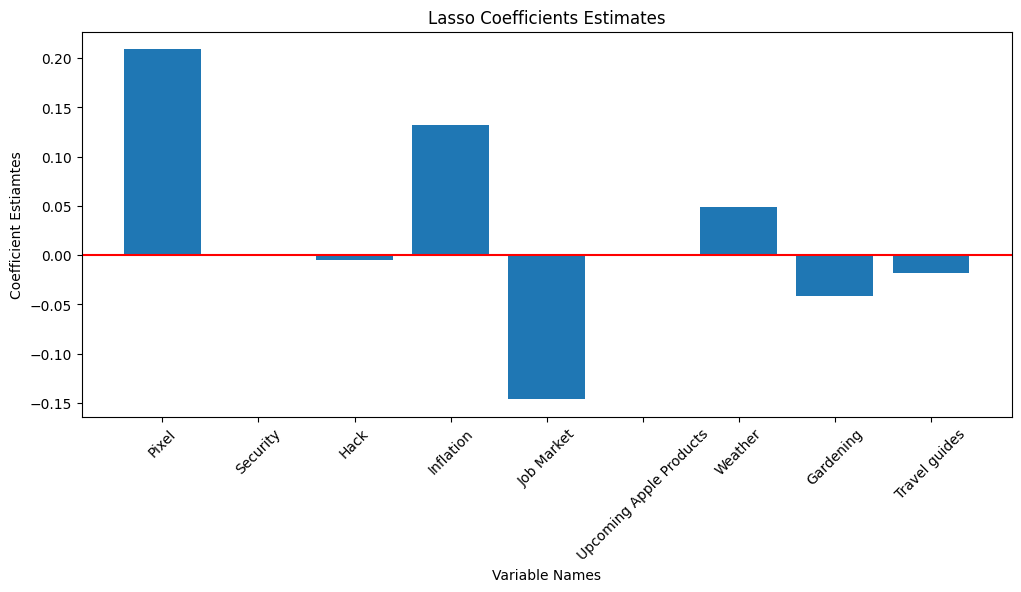

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), X.columns, rotation=45)  # Set tick labels
plt.axhline(0, color="red")
plt.xlabel("Variable Names")
plt.ylabel("Coefficient Estiamtes")
plt.title("Lasso Coefficients Estimates")
plt.show()

I set lambda = 0.1 to see the relationship between the coefficients. When lambda = .5, the penalization coefficient is too large and makes all of my coefficients equal to 0.

# 5.) Do these coefficient magnitudes make sense?

These coefficient magnitudes do not match what I previously thought in relation to Apple EPS. For Pixel, I thought there would be a negative coefficient. This is because searches for Google's Pixel phone indicates that there would be more interest in Pixel phones, which would be associated with smaller Apple sales. Instead, there is a relatively large, positive coefficient for Pixel; this could be due to multiple reasons. For example, an increase in searches for Pixel potentially indicates increased interest in buying a smartphone; this increases market confidence, increasing Apple's EPS. 

For security and hack, I thought that the coefficients would be large and negative; this is because more security issues in phones would decrease purchases for phones, decreasing EPS. However, the coefficients of both are close to 0; this could be due to the lack of direct relationship to Apple and potential additional external factors.

For inflation, there is a relatively large and positive coefficient; this is different than what I previously thought, which is that an increase in inflation searches would lead to a decrease in luxury purchases due to fear about increasing price increases. Inflation searches could instead relate to the idea that Apple can increase the price of its products, increasing EPS.

For “job market”, there is a large negative coefficient. This is what I previously predicted, because an increase in searches for "job market" indicates that there are issues in finding employment, decreasing the purchase of luxury goods and decreasing Apple's revenue. It is also connected to a decrease in investor confidence.

The search "Upcoming Apple Products" has a coefficient of 0. This is different from what I thought, where I thought the coefficient would be positive due to increased consumer interest. However, since it is 0, there is no real relationship between upcoming apple products and Apple EPS.

Weather, gardening, and travel guides all have small coefficients. While I anticipated them to be 0, they have larger coefficients compared to terms I thought were connected to Apple EPS. This is different than what I previously thought and does not make sense.

Overall, these coefficient magnitudes do not match my prior predictions, where multiple coefficients that I thought would be large were shrunk to 0, while the unrelated coefficients still remain in our model. Therefore, they do not make sense in relation to my prior predictions.